# 컬러스페이스
- 픽셀(pixel, 화소): 픽셀의 단위가 여러 개 모여 그림을 표현

- RGB (row x column x channel) / BGR
- cv2.cvtColor(img, flag) 통해서 컬러 스페이스를 변경

In [1]:
import cv2
import numpy as np

img = cv2.imread('./img/opencv_logo.png')
bgr = cv2.imread('./img/opencv_logo.png', cv2.IMREAD_COLOR)
# imread unchanged 옵션
bgra = cv2.imread('./img/opencv_logo.png', cv2.IMREAD_UNCHANGED)

# 각 옵션에 따른 이미지 shape
print('default:', img.shape, 'color:', bgr.shape, 'unchanged:', bgra.shape)

cv2.imshow('bgr', bgr)
cv2.imshow('bgra', bgra)
cv2.imshow('alpha', bgra[:,:,3]) # 알파 채널만 표시
cv2.waitKey(0)
cv2.destroyAllWindows()

default: (120, 98, 3) color: (120, 98, 3) unchanged: (120, 98, 4)


In [1]:
# p.118 컬러스페이스 변환
import cv2
import numpy as np

img = cv2.imread('./img/girl.jpg')
img2 = img.astype(np.uint16)         # dtype 변경 : 3채널의 값을 합한 경우, 255를 넘을 수도 있어서...
b, r, g = cv2.split(img2)            # 채널별로 분리 (b = img2[:,:,0], g = img2[:,:,1], r = img2[:,:,3])
gray1 = ((b+g+r)/3).astype(np.uint8) # 평균값 연산 후 dtype 변경

gray2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # BGR을 그레이 스케일로 변경
cv2.imshow('original', img)
cv2.imshow('gray1', gray1)
cv2.imshow('gray2', gray2)

cv2.waitKey(0)
cv2.destroyAllWindows()

## HSV
- out = cv2.cvtColor(img, flag)
- flag : COLOR_BGR2GRAY, BGR2RGB, BGR2HSV, BGR2YUV
- HSV = H(HUE): 색조 / S(SATURATION): 채도 / V(VALUE): 명도 (I(INTENSITY): 밀도, L(LIGHTNESS): 명도)

In [1]:
# p.121
import cv2
import numpy as np

red_bgr = np.array([[[0, 0, 255]]], dtype=np.uint8)
green_bgr = np.array([[[0, 255, 0]]], dtype=np.uint8)
blue_bgr = np.array([[[255, 0, 0]]], dtype=np.uint8)
yellow_bgr = np.array([[[0, 255, 255]]], dtype=np.uint8)

red_hsv = cv2.cvtColor(red_bgr, cv2.COLOR_BGR2HSV)
green_hsv = cv2.cvtColor(green_bgr, cv2.COLOR_BGR2HSV)
blue_hsv = cv2.cvtColor(blue_bgr, cv2.COLOR_BGR2HSV)
yellow_hsv = cv2.cvtColor(yellow_bgr, cv2.COLOR_BGR2HSV)

print('red:', red_hsv)
print('green:', green_hsv)
print('blue:', blue_hsv)
print('yellow:', yellow_hsv)

red: [[[  0 255 255]]]
green: [[[ 60 255 255]]]
blue: [[[120 255 255]]]
yellow: [[[ 30 255 255]]]


## YUV, YCbCr : 사람에게 민감한 밝기와 상대적으로 둔감한 색상을 고려해 만든 컬러스페이스
- Y : Luma (밝기), 많은 비트수를 할당하고 U와 V에는 적은 비트수를 할당해 데이터를 압축하는 효과
- U : Chroma Blue (밝기와 파란색과의 색상 차)
- V : Chroma Red (밝기와 빨간색과의 색상 차)

In [2]:
# p.123
import cv2
import numpy as np

dark = np.array([[[0, 0, 0]]], dtype=np.uint8)
middle = np.array([[[127, 127, 127]]], dtype=np.uint8)
bright = np.array([[[255, 255, 255]]], dtype=np.uint8)

dark_yuv =  cv2.cvtColor(dark, cv2.COLOR_BGR2YUV)
middle_yuv =  cv2.cvtColor(middle, cv2.COLOR_BGR2YUV)
bright_yuv =  cv2.cvtColor(bright, cv2.COLOR_BGR2YUV)

print('dark', dark_yuv)
print('middle', middle_yuv)
print('bright', bright_yuv)

dark [[[  0 128 128]]]
middle [[[127 128 128]]]
bright [[[255 128 128]]]


## 스레시홀딩 : 여러 값을 경계점을 기준으로 두 가지 부류로 나누는 것 (Binary image 만드는 대표적 방법)
### 전역 스레시홀딩
- 각 픽셀의 값이 경계 값 넘으면 255, 넘지 못하면 0을 지정
- cv2.threshold() 함수로 많은 기능

127.0


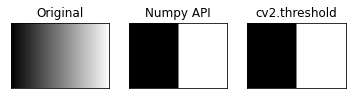

In [24]:
# p.124
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./img/gray_gradient.jpg')
# img = cv2.imread('./img/gray_gredient.jpg', cv2.IMREAD_GRAYSCALE)

thresh_np = np.zeros_like(img)
thresh_np[img>127] = 255     # 127보다 큰 값을 255 반환

# openCV로 바이너이 이미지 만들기
ret, thresh_cv = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
print(ret)

# original & result
imgs = {'Original': img, 'Numpy API': thresh_np, 'cv2.threshold': thresh_cv}
for i, (key, value) in enumerate(imgs.items()):
    plt.subplot(1, 3, i+1)
    plt.title(key)
    plt.imshow(value, cmap='gray')
    plt.xticks([])
    plt.yticks([])

plt.show()

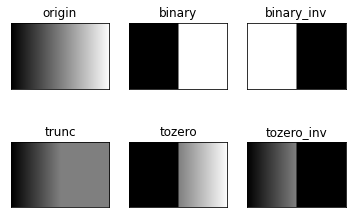

In [27]:
# p.126
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./img/gray_gradient.jpg')

_, t_bin = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
_, t_bininv = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
_, t_truc = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
_, t_2zr = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
_, t_2zrinv = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)

imgs = {'origin': img, 'binary': t_bin, 'binary_inv': t_bininv, 'trunc': t_truc,
        'tozero': t_2zr, 'tozero_inv': t_2zrinv}

for i, (key, value) in enumerate(imgs.items()):
    plt.subplot(2, 3, i+1)
    plt.title(key)
    plt.imshow(value, cmap='gray')
    plt.xticks([])
    plt.yticks([])
plt.show()

## 이미지 연산
### 영상과 영상의 연산
- 총 4가지 연산 가능 (덧셈, 뺄셈, 곱셈, 나눗셈)

In [31]:
# p.133 기초 연산
import cv2
import numpy as np

a = np.uint8([200, 50])
b = np.uint8([100, 100])

add1 = a + b
sub1 = a - b
mult1 = a*2
div1 = a/3

add2 = cv2.add(a, b)
sub2 = cv2.subtract(a, b)
mult2 = cv2.multiply(a, 2)
div2 = cv2.divide(a, 3)

print(a, b)
print(add1, add2)
print(sub1, sub2)
print(mult1, mult2)
print(div1, div2)

[200  50] [100 100]
[ 44 150] [[255]
 [150]]
[100 206] [[100]
 [  0]]
[144 100] [[255]
 [100]]
[66.66666667 16.66666667] [[67]
 [17]]


In [33]:
# p.134
import cv2
import numpy as np

a = np.array([[1, 2]], dtype=np.uint8)
b = np.array([[10, 20]], dtype=np.uint8)

# 2번째 요소가 0인 mask create
mask = np.array([[1, 0]], dtype=np.uint8)

# 누적 할당과의 비교연산
c1 = cv2.add(a, b, None, mask)
print(c1)
c2 = cv2.add(a, b, a, mask)
print(c2)

[[11  0]]
[[11  2]]


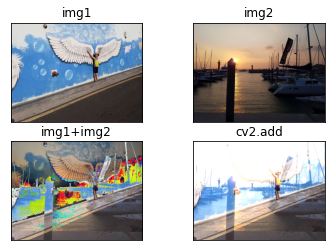

In [34]:
# p.135 알파 블렌딩
import cv2
import numpy as np
import matplotlib.pyplot as plt

img1 = cv2.imread('./img/wing_wall.jpg')
img2 = cv2.imread('./img/yate.jpg')

img3 = img1 + img2
img4 = cv2.add(img1, img2)

imgs = {'img1': img1, 'img2': img2, 'img1+img2': img3, 'cv2.add': img4}

for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(2, 2, i+1)
    plt.imshow(v[:, :, ::-1])
    plt.title(k)
    plt.xticks([])
    plt.yticks([])
plt.show()

In [35]:
# p.137 50% alpha blending
import cv2
import numpy as np

img1 = cv2.imread('./img/wing_wall.jpg')
img2 = cv2.imread('./img/yate.jpg')

# 수식을 이용해 직접 연산해 알파블렌딩
alpha = 0.5

blended = img1*alpha + img2*(1 - alpha)
blended = blended.astype(np.uint8)
cv2.imshow('blended', blended)

# addWeighted() 함수로 알파블렌딩
dst = cv2.addWeighted(img1, alpha, img2, (1-alpha), 0)
cv2.imshow('cv2.addWeighted()', dst)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [40]:
# 트랙바를 이용한 알파 블렌딩
# p.137 50% alpha blending
import cv2
import numpy as np

win_name = 'Alpha Blending'
trackbar_name = 'fade'

def onChange(x):
    alpha = x/100
    dst = cv2.addWeighted(img1, 1-alpha, img2, alpha, 0)
    cv2.imshow(win_name, dst)

img1 = cv2.imread('./img/man_face.jpg')
img2 = cv2.imread('./img/lion_face.jpg')


# 트랙바 생성
cv2.imshow(win_name, img1)
cv2.createTrackbar(trackbar_name, win_name, 0, 100, onChange)

cv2.waitKey()
cv2.destroyAllWindows()

## 비트와이즈 연산 (bitwise, 비트 단위)
- 두 영상을 합성할 때, 특정 영역만 선택하거나 특정 영역만 제외하는 등의 선별적인 연산에 도움

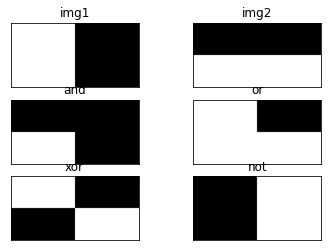

In [42]:
# p.139
import cv2
import numpy as np
import matplotlib.pyplot as plt

img1 = np.zeros((200, 400), dtype=np.uint8)
img2 = np.zeros((200, 400), dtype=np.uint8)
img1[:, :200] = 255
img2[100:200, :] = 255

bitAnd = cv2.bitwise_and(img1, img2)  # 0인 곳은 0 으로
bitOr = cv2.bitwise_or(img1, img2)    # 255로 채워진 부분 = 255
bitXor = cv2.bitwise_xor(img1, img2)  # 서로 다른 값 = 255, 서로 같은 값 = 0
bitNot = cv2.bitwise_not(img1)        # 원래의 연산과 반대 값

imgs = {'img1': img1, 'img2': img2, 'and': bitAnd, 'or': bitOr, 'xor': bitXor, 'not': bitNot}

for i, (title, img) in enumerate(imgs.items()):
    plt.subplot(3, 2, i+1)
    plt.imshow(img, 'gray')
    plt.title(title)
    plt.xticks([])
    plt.yticks([])
plt.show()

In [43]:
# p.141
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./img/girl.jpg')

# 마스크 만들기
mask = np.zeros_like(img)
# cv2.circle(이미지, (원점x, 원점y), 반지름, (색상), -1)
cv2.circle(mask, (150, 140), 100, (255, 255, 255), -1)

# 마스킹
masked = cv2.bitwise_and(img, mask)

# result
cv2.imshow('original', img)
cv2.imshow('mask', mask)
cv2.imshow('masked', masked)
cv2.waitKey()
cv2.destroyAllWindows()